In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 16.3 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_excel('200_participant_collected_data.xlsx')
df.head()

,Participant Number,Gender,Age,Dominant Hand,Height (cm) (average of 3 measurments),Weight (kg) (average of 3 measurements),Fingertip Temperature (°C),Fingerprint Height (mm),Fingerprint Width (mm),Fingerprint Area (mm2),Fingerprint Circumference (mm)
0,101,Male,NaN,Right,174.000000,70.000000,34.0,19.8,13.7,240.6,57.7
1,102,Male,NaN,Right,202.000000,99.000000,30.0,24.0,14.1,278.8,62.7
2,103,Male,NaN,Right,182.333333,82.000000,29.0,20.0,13.7,223.8,55.5
3,104,Male,NaN,Right,184.000000,75.000000,29.0,23.2,14.0,281.8,63.3
4,105,Male,18.0,Right,180.666667,80.333333,29.0,22.7,15.0,286.7,62.7


# Question 1

In [5]:
cut_labels = ["18-19", "20-21", "22-23", "24-25", "25-27"]

cut_bins = [18, 20, 22, 24, 25, 27] 

df['Age_Range'] = pd.cut(df['Age'], bins = cut_bins, labels = cut_labels, include_lowest = True)
df.head()

,Participant Number,Gender,Age,Dominant Hand,Height (cm) (average of 3 measurments),Weight (kg) (average of 3 measurements),Fingertip Temperature (°C),Fingerprint Height (mm),Fingerprint Width (mm),Fingerprint Area (mm2),Fingerprint Circumference (mm),Age_Range
0,101,Male,NaN,Right,174.000000,70.000000,34.0,19.8,13.7,240.6,57.7,NaN
1,102,Male,NaN,Right,202.000000,99.000000,30.0,24.0,14.1,278.8,62.7,NaN
2,103,Male,NaN,Right,182.333333,82.000000,29.0,20.0,13.7,223.8,55.5,NaN
3,104,Male,NaN,Right,184.000000,75.000000,29.0,23.2,14.0,281.8,63.3,NaN
4,105,Male,18.0,Right,180.666667,80.333333,29.0,22.7,15.0,286.7,62.7,18-19


In [8]:
df.dropna()
df

,Participant Number,Gender,Age,Dominant Hand,Height (cm) (average of 3 measurments),Weight (kg) (average of 3 measurements),Fingertip Temperature (°C),Fingerprint Height (mm),Fingerprint Width (mm),Fingerprint Area (mm2),Fingerprint Circumference (mm),Age_Range
0,101,Male,NaN,Right,174.000000,70.000000,34.0,19.8,13.7,240.6,57.7,NaN
1,102,Male,NaN,Right,202.000000,99.000000,30.0,24.0,14.1,278.8,62.7,NaN
2,103,Male,NaN,Right,182.333333,82.000000,29.0,20.0,13.7,223.8,55.5,NaN
3,104,Male,NaN,Right,184.000000,75.000000,29.0,23.2,14.0,281.8,63.3,NaN
4,105,Male,18.0,Right,180.666667,80.333333,29.0,22.7,15.0,286.7,62.7,18-19
...,...,...,...,...,...,...,...,...,...,...,...,...
195,296,Female,NaN,Right,164.000000,66.333333,31.0,19.1,12.5,202.5,52.9,NaN
196,297,Male,19.0,Right,172.000000,75.666667,31.0,21.9,13.0,234.8,57.5,18-19
197,298,Male,22.0,Right,174.000000,63.333333,25.0,22.1,15.1,284.1,62.0,20-21
198,299,Male,23.0,Right,174.666667,79.666667,33.0,21.9,15.3,279.2,61.7,22-23


In [11]:
height_vs_age = df.groupby(["Age_Range", "Gender"])['Height (cm) (average of 3 measurments)'].mean().reset_index(name = 'Avg_Height')
height_vs_age.head(10)

,Age_Range,Gender,Avg_Height
0,18-19,Female,166.533333
1,18-19,Male,178.406667
2,20-21,Female,165.805556
3,20-21,Male,178.570175
4,22-23,Female,161.666667
5,22-23,Male,173.472222
6,24-25,Female,NaN
7,24-25,Male,176.000000
8,25-27,Female,164.444444
9,25-27,Male,177.666667


Text(0.5, 1.0, 'Age Range vs Average Height')

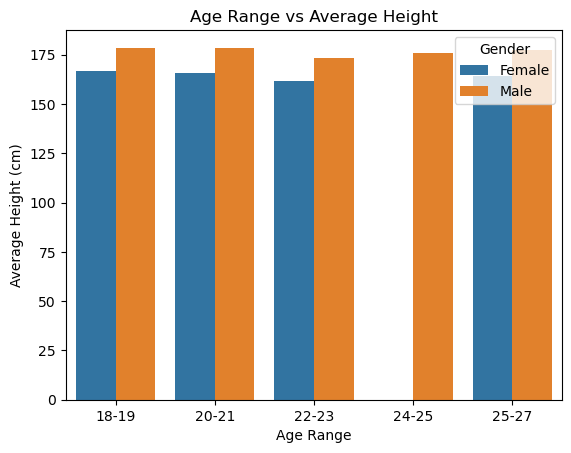

In [12]:
sns.barplot(height_vs_age, x = 'Age_Range', y = 'Avg_Height', hue = 'Gender')
plt.xlabel('Age Range')
plt.ylabel('Average Height (cm)')
plt.title('Age Range vs Average Height')

# Question 2

In [13]:
weight_vs_age = df.groupby(["Age_Range", "Gender"])['Weight (kg) (average of 3 measurements)'].mean().reset_index(name = 'Avg_Weight')
weight_vs_age.head(10)

,Age_Range,Gender,Avg_Weight
0,18-19,Female,61.313333
1,18-19,Male,76.940000
2,20-21,Female,66.611111
3,20-21,Male,79.578947
4,22-23,Female,57.777778
5,22-23,Male,74.166667
6,24-25,Female,NaN
7,24-25,Male,76.666667
8,25-27,Female,83.666667
9,25-27,Male,87.666667


Text(0.5, 1.0, 'Age Range vs Average Weight')

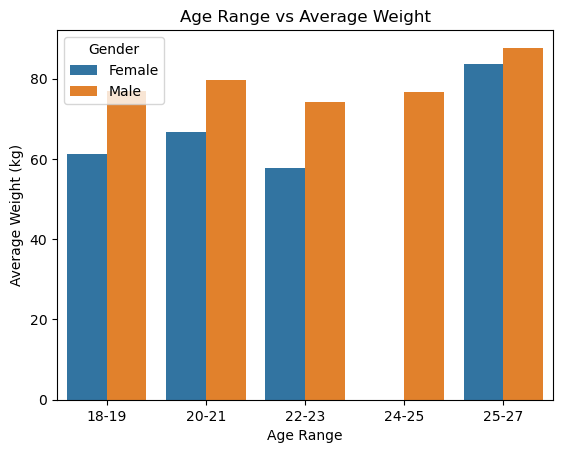

In [14]:
sns.barplot(weight_vs_age, x = 'Age_Range', y = 'Avg_Weight', hue = 'Gender')
plt.xlabel('Age Range')
plt.ylabel('Average Weight (kg)')
plt.title('Age Range vs Average Weight')

# Question 3

Comparing the two figures obtained in (1) and (2), I can conclude that males are both taller and heavier than females as in can be seen in both graphs, males have a taller average height and a heavier average weight in every single age range. 

# Question 4

A better single data visualization to identify the relationship in (3) is make a scatter plot that has the average height as the x-axis and the average weight as the y-axis. Additionally, this scatter plot should include 2 more dimensions, those being the age range and the gender to really see how the two genders compare with each other and to also see if age range is a factor in height or weight. 

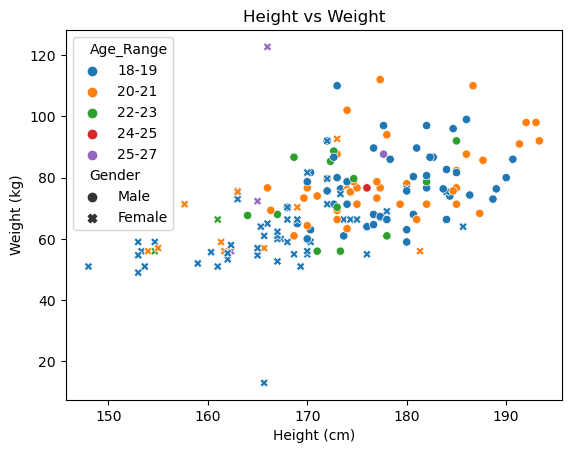

In [17]:
sns.scatterplot(data = df, 
                x = 'Height (cm) (average of 3 measurments)', 
                y = 'Weight (kg) (average of 3 measurements)', 
                hue = 'Age_Range',
                style = 'Gender')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight')
plt.show()